# Import Libraries & Dataset

In [61]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

# Import & Display Dataset
df_raw = pd.read_excel("Training Matrix Results.xlsx")
display(df_raw.info());
df_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Initial           21 non-null     object
 1   Position          21 non-null     object
 2   Score             21 non-null     object
 3   Summaries Used    17 non-null     object
 4   Type of Training  21 non-null     object
 5   Notes             6 non-null      object
dtypes: object(6)
memory usage: 1.1+ KB


None

,Initial,Position,Score,Summaries Used,Type of Training,Notes
0,MBA,ABM,22/25,NaN,Refresher,Current Assistant Boutique Manager – Did not r...
1,DH,BARD,23/25,Third Draft,Refresher,NaN
2,SS,BM,20/25,NaN,Refresher,Current Boutique Manager – Did not read summaries
3,AK,CS,24/25,Third Draft,Refresher,Bonus Point added because CS volunteered to be...
4,AN,CS,22/25,Third Draft,Refresher,Former TL – Did not read summaries
5,BN,CS,22/25,Third Draft,Refresher,NaN
6,ChL,CS,20/25,NaN,Refresher,Former TL & QC - Did not read summaries
7,CD,CS,21/25,Third Draft,Induction,NaN
8,DD,CS,17/25,Third Draft,Induction,NaN
9,EA,CS,15/25,Third Draft,Refresher,NaN


# Data Cleaning

In [62]:
def perform_cleaning(data):
    dff = data.copy();
    
    # Create 'Numerical Score' & 'Percentage Score' columns using 'Score' column
    dff["Numerical Score"] = dff["Score"].apply(lambda x: x.split("/")[0]);
    dff["Percentage Score"] = dff["Score"].apply(lambda x: (int(x.split("/")[0]) / int(x.split("/")[1])) * 100);
    dff["Numerical Score"] = dff["Numerical Score"].astype(int);
    dff["Percentage Score"] = dff["Percentage Score"].astype(float);
    
    # Create 'Department' column using 'Position' column
    dff["Department"] = "";
    for i in dff.index:
        if dff.loc[i, "Position"] in ["BM","ABM","TL"]:
            dff.loc[i, "Department"] = "Management";
        elif dff.loc[i, "Position"] in ["SSS","SS"]:
            dff.loc[i, "Department"] = "Stock";
        else:
            dff.loc[i, "Department"] = "Sales";

    # Replace Null Values in 'Summaries Used' column
    dff["Summaries Used"] = dff["Summaries Used"].fillna("No Summaries Read");

    # Rename 'Initial' Column to "Employee"
    dff = dff.rename(columns={"Initial":"Employee"});

    # Exclude TQM TL from Analysis
    dff = dff[dff["Employee"] != "KJ"];

    # Rearrange order of columns
    dff = dff[["Employee","Position","Department","Type of Training","Summaries Used","Score","Numerical Score","Percentage Score","Notes"]];

    return dff;

df = perform_cleaning(df_raw);
display(df.info());
df

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 20
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee          20 non-null     object 
 1   Position          20 non-null     object 
 2   Department        20 non-null     object 
 3   Type of Training  20 non-null     object 
 4   Summaries Used    20 non-null     object 
 5   Score             20 non-null     object 
 6   Numerical Score   20 non-null     int32  
 7   Percentage Score  20 non-null     float64
 8   Notes             5 non-null      object 
dtypes: float64(1), int32(1), object(7)
memory usage: 1.5+ KB


None

,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
0,MBA,ABM,Management,Refresher,No Summaries Read,22/25,22,88.0,Current Assistant Boutique Manager – Did not r...
1,DH,BARD,Sales,Refresher,Third Draft,23/25,23,92.0,NaN
2,SS,BM,Management,Refresher,No Summaries Read,20/25,20,80.0,Current Boutique Manager – Did not read summaries
3,AK,CS,Sales,Refresher,Third Draft,24/25,24,96.0,Bonus Point added because CS volunteered to be...
4,AN,CS,Sales,Refresher,Third Draft,22/25,22,88.0,Former TL – Did not read summaries
5,BN,CS,Sales,Refresher,Third Draft,22/25,22,88.0,NaN
6,ChL,CS,Sales,Refresher,No Summaries Read,20/25,20,80.0,Former TL & QC - Did not read summaries
7,CD,CS,Sales,Induction,Third Draft,21/25,21,84.0,NaN
8,DD,CS,Sales,Induction,Third Draft,17/25,17,68.0,NaN
9,EA,CS,Sales,Refresher,Third Draft,15/25,15,60.0,NaN


# Analysis
> The TQM TL's results are not incorporated in the forthcoming analysis as they were the employee that constructed the Training Matrix summaries and facilitated the Training Matrix test.

**Summary Statistics**

In [63]:
df.describe()

,Numerical Score,Percentage Score
count,20.000000,20.000000
mean,20.250000,81.000000
std,2.672964,10.691856
min,15.000000,60.000000
25%,19.000000,76.000000
50%,21.000000,84.000000
75%,22.000000,88.000000
max,25.000000,100.000000


**Distribution of Positions**

,Position,Count
0,CS,10
1,SS,3
2,TL,3
3,ABM,1
4,BARD,1
5,BM,1
6,SSS,1


<Axes: title={'center': 'Distribution of Positions'}, xlabel='Position', ylabel='Count'>

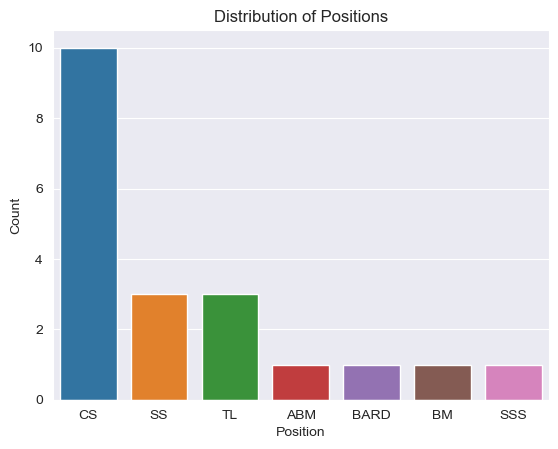

In [64]:
def distribution_of_positions(data):
    dff = data["Position"].value_counts();
    df_agg = pd.DataFrame({
        "Position":dff.index.tolist(),
        "Count":dff.values.tolist()
    });
    df_agg = df_agg.sort_values(by="Count", ascending=False);
    display(df_agg);
    ax = sns.barplot(data=df_agg, x="Position", y="Count");
    ax.set(title="Distribution of Positions");
    return ax;

distribution_of_positions(df)

**Distribution of Departments**

,Department,Count
0,Sales,11
1,Management,5
2,Stock,4


<Axes: title={'center': 'Distribution of Departments'}, xlabel='Department', ylabel='Count'>

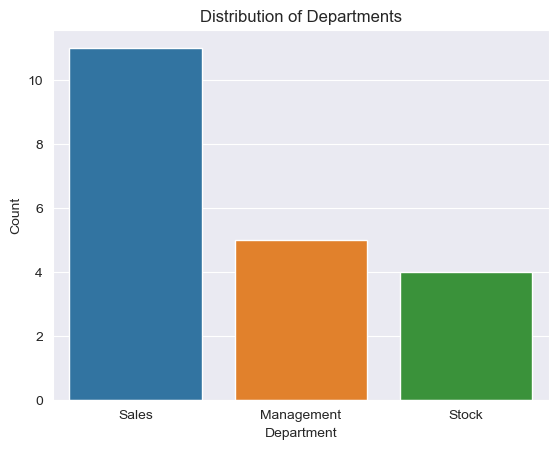

In [65]:
def distribution_of_department(data):
    dff = data["Department"].value_counts();
    df_agg = pd.DataFrame({
        "Department":dff.index.tolist(),
        "Count":dff.values.tolist()
    });
    df_agg = df_agg.sort_values(by="Count", ascending=False);
    display(df_agg);
    ax = sns.barplot(data=df_agg, x="Department", y="Count");
    ax.set(title="Distribution of Departments");
    return ax;

distribution_of_department(df)

**Proportion on the Type of Training**

,Type of Training,Count
0,Refresher,14
1,Induction,6


([<matplotlib.patches.Wedge at 0x184db0807f0>,
 [Text(-0.6465637441936393, 0.8899187180267096, 'Refresher'),
  Text(0.6465637441936392, -0.8899187180267097, 'Induction')],
 [Text(-0.3526711331965305, 0.4854102098327506, '70%'),
  Text(0.3526711331965304, -0.48541020983275074, '30%')])

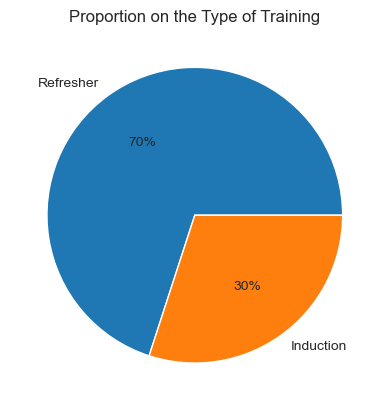

In [66]:
def type_of_training_proportion(data):
    dff = data["Type of Training"].value_counts();
    df_agg = pd.DataFrame({
        "Type of Training":dff.index.tolist(),
        "Count":dff.values.tolist()
    });
    display(df_agg);
    ax = plt.pie(df_agg["Count"], labels=df_agg["Type of Training"], autopct='%.0f%%');
    plt.title("Proportion on the Type of Training");
    return ax;

type_of_training_proportion(df)

**Proportion of Summaries Used**

,Summaries Used,Count
0,Third Draft,14
1,No Summaries Read,3
2,Second Draft,3


([<matplotlib.patches.Wedge at 0x184db0cd4c0>,
 [Text(-0.6465637441936393, 0.8899187180267096, 'Third Draft'),
  Text(0.17207785051137656, -1.086457184321308, 'No Summaries Read'),
  Text(0.9801071672559598, -0.4993895680663526, 'Second Draft')],
 [Text(-0.3526711331965305, 0.4854102098327506, '70%'),
  Text(0.0938606457334781, -0.5926130096298043, '15%'),
  Text(0.5346039094123416, -0.27239430985437413, '15%')])

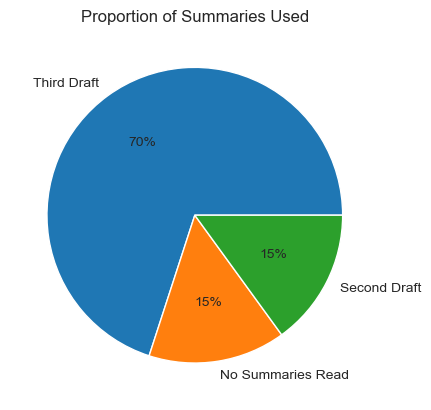

In [67]:
def proportion_of_summaries_used(data):
    dff = data["Summaries Used"].value_counts();
    df_agg = pd.DataFrame({
        "Summaries Used":dff.index.tolist(),
        "Count":dff.values.tolist()
    });
    display(df_agg);
    # df_agg = df_agg[df_agg["Summaries Used"] != "No Summaries Read"];
    ax = plt.pie(df_agg["Count"], labels=df_agg["Summaries Used"], autopct='%.0f%%');
    plt.title("Proportion of Summaries Used");
    return ax;

proportion_of_summaries_used(df)

**Highest, Lowest, and Average Scores Achieved by Position**

,Position,Maximum Numerical Score,Maximum Percentage Score,Minimum Numerical Score,Minimum Percentage Score,Average Numerical Score,Average Percentage Score
0,ABM,22,88.0,22,88.0,22.000000,88.000000
1,BARD,23,92.0,23,92.0,23.000000,92.000000
2,BM,20,80.0,20,80.0,20.000000,80.000000
3,CS,25,100.0,15,60.0,20.600000,82.400000
4,SS,21,84.0,19,76.0,20.333333,81.333333
5,SSS,21,84.0,21,84.0,21.000000,84.000000
6,TL,20,80.0,15,60.0,17.333333,69.333333


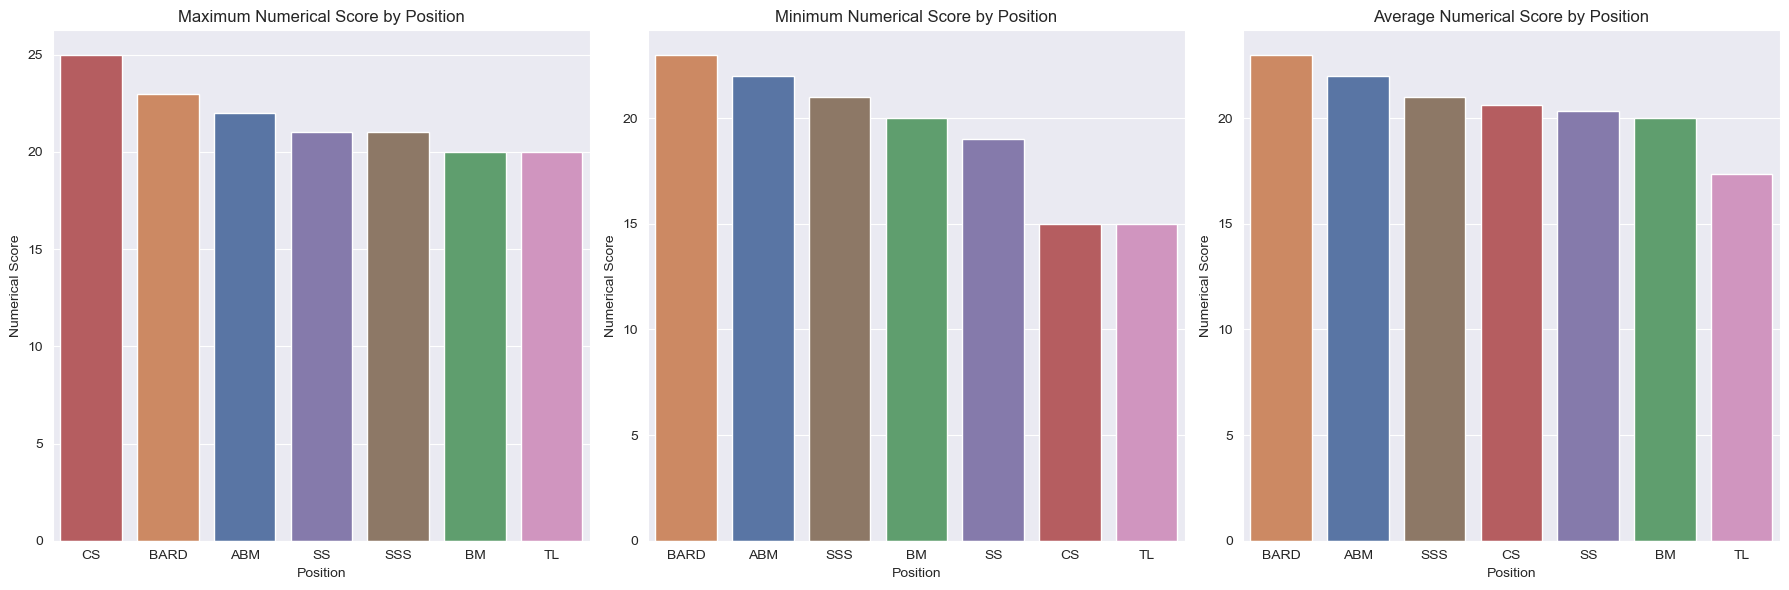

In [68]:
def score_aggregation_by_position(dataframe):
    columns = [
        "Position",
        "Maximum Numerical Score",
        "Maximum Percentage Score",
        "Minimum Numerical Score",
        "Minimum Percentage Score",
        "Average Numerical Score",
        "Average Percentage Score",
    ];
    data = [];
    for position in dataframe["Position"].unique().tolist():
        row = [];
        dff = dataframe[dataframe["Position"] == position];
        
        # Position
        row.append(position);
        # Maximum Score
        row.append(np.max(dff["Numerical Score"]));
        row.append(np.max(dff["Percentage Score"]));
        # Minimum Score
        row.append(np.min(dff["Numerical Score"]));
        row.append(np.min(dff["Percentage Score"]));
        # Average Score
        row.append(np.mean(dff["Numerical Score"]));
        row.append(np.mean(dff["Percentage Score"]));

        data.append(row);
    
    df_agg = pd.DataFrame(data, columns=columns);
    display(df_agg);

    fig, axes = plt.subplots(1, 3, figsize=(18, 6));
    standardized_palette = {
        "ABM":"#4c72b0",
        "BARD":"#dd8452",
        "BM":"#55a868",
        "CS":"#c44e52",
        "SS":"#8172b3",
        "SSS":"#937860",
        "TL":"#da8bc3"
    };
    sns.barplot(
        data=df_agg.sort_values(by="Maximum Numerical Score", ascending=False), 
        x="Position", 
        y="Maximum Numerical Score", 
        ax=axes[0],
        palette=standardized_palette
    );
    axes[0].set(title="Maximum Numerical Score by Position", ylabel="Numerical Score");
    sns.barplot(
        data=df_agg.sort_values(by="Minimum Numerical Score", ascending=False), 
        x="Position", 
        y="Minimum Numerical Score", 
        ax=axes[1],
        palette=standardized_palette
    );
    axes[1].set(title="Minimum Numerical Score by Position", ylabel="Numerical Score");
    sns.barplot(
        data=df_agg.sort_values(by="Average Numerical Score", ascending=False), 
        x="Position", 
        y="Average Numerical Score", 
        ax=axes[2],
        palette=standardized_palette
    );
    axes[2].set(title="Average Numerical Score by Position", ylabel="Numerical Score");
    plt.tight_layout();

score_aggregation_by_position(df)

**Highest, Lowest, and Average Scores Achieved by Department**

,Department,Maximum Numerical Score,Maximum Percentage Score,Minimum Numerical Score,Minimum Percentage Score,Average Numerical Score,Average Percentage Score
0,Management,22,88.0,15,60.0,18.800000,75.200000
1,Sales,25,100.0,15,60.0,20.818182,83.272727
2,Stock,21,84.0,19,76.0,20.500000,82.000000


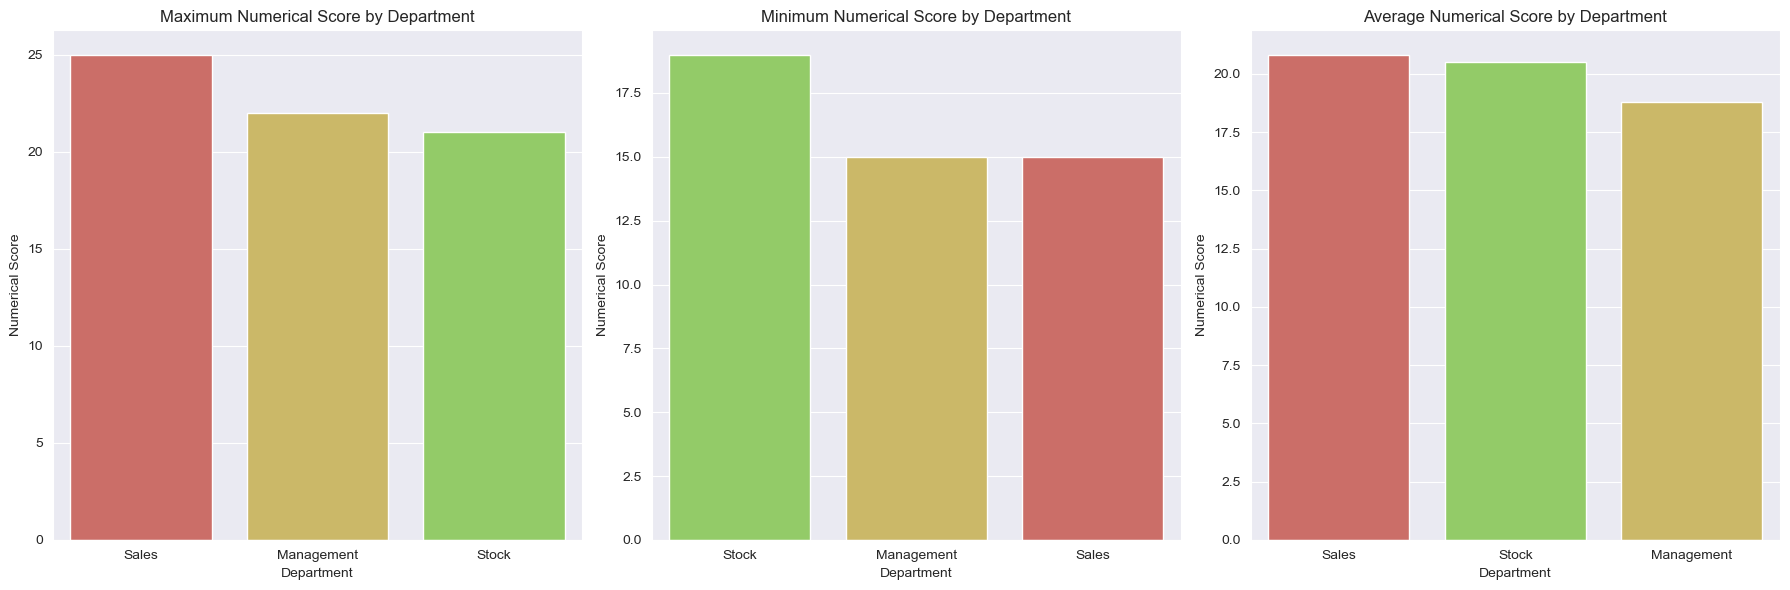

In [69]:
def score_aggregation_by_department(dataframe):
    columns = [
        "Department",
        "Maximum Numerical Score",
        "Maximum Percentage Score",
        "Minimum Numerical Score",
        "Minimum Percentage Score",
        "Average Numerical Score",
        "Average Percentage Score",
    ];
    data = [];
    for department in dataframe["Department"].unique().tolist():
        row = [];
        dff = dataframe[dataframe["Department"] == department];
        
        # Position
        row.append(department);
        # Maximum Score
        row.append(np.max(dff["Numerical Score"]));
        row.append(np.max(dff["Percentage Score"]));
        # Minimum Score
        row.append(np.min(dff["Numerical Score"]));
        row.append(np.min(dff["Percentage Score"]));
        # Average Score
        row.append(np.mean(dff["Numerical Score"]));
        row.append(np.mean(dff["Percentage Score"]));

        data.append(row);
    
    df_agg = pd.DataFrame(data, columns=columns);
    display(df_agg);

    fig, axes = plt.subplots(1, 3, figsize=(18, 6));
    standardized_palette = {
        "Sales":"#db5f57",
        "Management":"#dbc257",
        "Stock":"#91db57"
    };
    sns.barplot(
        data=df_agg.sort_values(by="Maximum Numerical Score", ascending=False), 
        x="Department", 
        y="Maximum Numerical Score", 
        ax=axes[0],
        palette=standardized_palette
    );
    axes[0].set(title="Maximum Numerical Score by Department", ylabel="Numerical Score");
    sns.barplot(
        data=df_agg.sort_values(by="Minimum Numerical Score", ascending=False), 
        x="Department", 
        y="Minimum Numerical Score", 
        ax=axes[1],
        palette=standardized_palette
    );
    axes[1].set(title="Minimum Numerical Score by Department", ylabel="Numerical Score");
    sns.barplot(
        data=df_agg.sort_values(by="Average Numerical Score", ascending=False), 
        x="Department", 
        y="Average Numerical Score", 
        ax=axes[2],
        palette=standardized_palette
    );
    axes[2].set(title="Average Numerical Score by Department", ylabel="Numerical Score");
    plt.tight_layout();

score_aggregation_by_department(df)

**Highest, Lowest, and Average Scores Achieved by Type of Training**

,Type of Training,Maximum Numerical Score,Maximum Percentage Score,Minimum Numerical Score,Minimum Percentage Score,Average Numerical Score,Average Percentage Score
0,Refresher,25,100.0,15,60.0,20.928571,83.714286
1,Induction,21,84.0,15,60.0,18.666667,74.666667


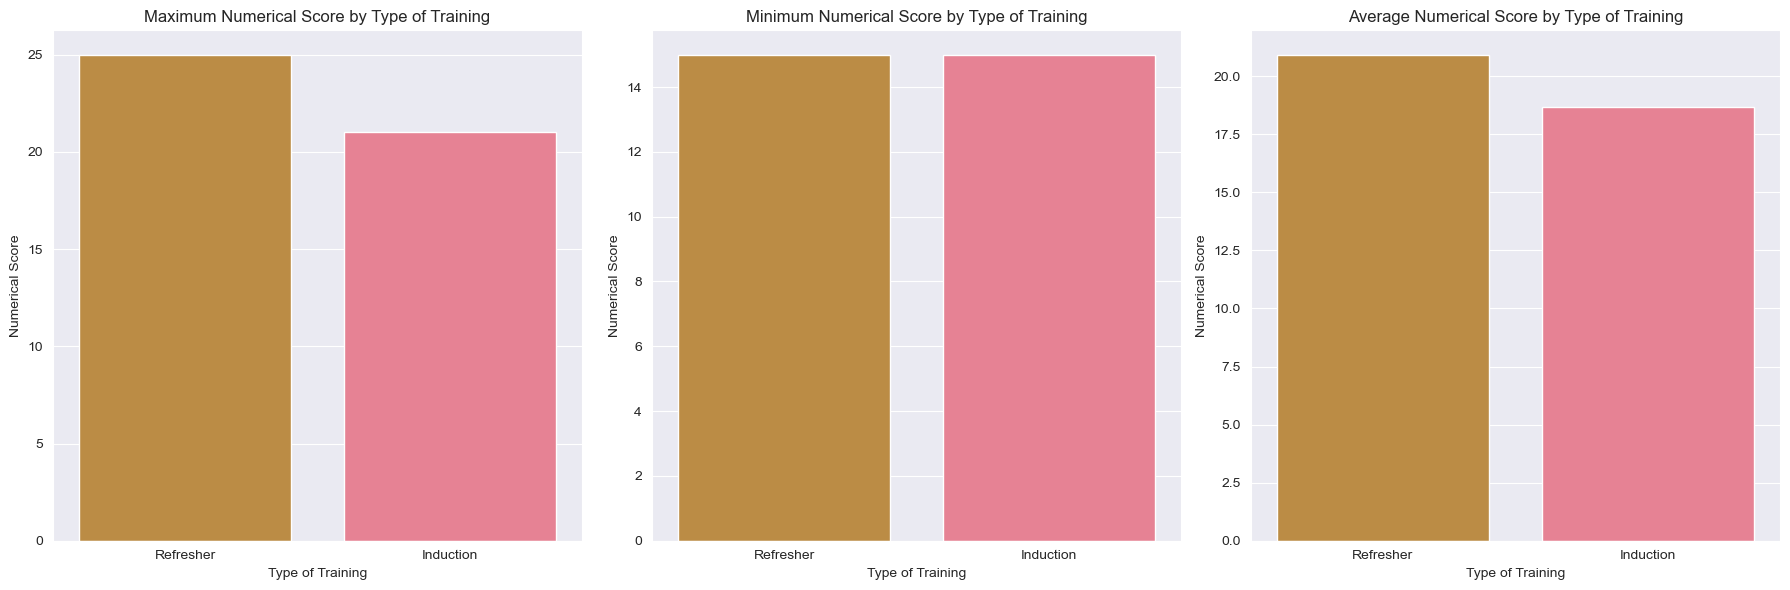

In [70]:
def score_aggregation_by_type_of_training(dataframe):
    columns = [
        "Type of Training",
        "Maximum Numerical Score",
        "Maximum Percentage Score",
        "Minimum Numerical Score",
        "Minimum Percentage Score",
        "Average Numerical Score",
        "Average Percentage Score",
    ];
    data = [];
    for trainingType in dataframe["Type of Training"].unique().tolist():
        row = [];
        dff = dataframe[dataframe["Type of Training"] == trainingType];
        
        # Position
        row.append(trainingType);
        # Maximum Score
        row.append(np.max(dff["Numerical Score"]));
        row.append(np.max(dff["Percentage Score"]));
        # Minimum Score
        row.append(np.min(dff["Numerical Score"]));
        row.append(np.min(dff["Percentage Score"]));
        # Average Score
        row.append(np.mean(dff["Numerical Score"]));
        row.append(np.mean(dff["Percentage Score"]));

        data.append(row);
    
    df_agg = pd.DataFrame(data, columns=columns);
    display(df_agg);

    fig, axes = plt.subplots(1, 3, figsize=(18, 6));
    standardized_palette = {
        "Induction":"#f77189",
        "Refresher":"#ce9032",
    };
    sns.barplot(
        data=df_agg.sort_values(by="Maximum Numerical Score", ascending=False), 
        x="Type of Training", 
        y="Maximum Numerical Score", 
        ax=axes[0],
        palette=standardized_palette
    );
    axes[0].set(title="Maximum Numerical Score by Type of Training", ylabel="Numerical Score");
    sns.barplot(
        data=df_agg.sort_values(by="Minimum Numerical Score", ascending=False), 
        x="Type of Training", 
        y="Minimum Numerical Score", 
        ax=axes[1],
        palette=standardized_palette
    );
    axes[1].set(title="Minimum Numerical Score by Type of Training", ylabel="Numerical Score");
    sns.barplot(
        data=df_agg.sort_values(by="Average Numerical Score", ascending=False), 
        x="Type of Training", 
        y="Average Numerical Score", 
        ax=axes[2],
        palette=standardized_palette
    );
    axes[2].set(title="Average Numerical Score by Type of Training", ylabel="Numerical Score");
    plt.tight_layout();

score_aggregation_by_type_of_training(df)

**Highest, Lowest, and Average Scores Achieved by Summaries Used**

,Summaries Used,Maximum Numerical Score,Maximum Percentage Score,Minimum Numerical Score,Minimum Percentage Score,Average Numerical Score,Average Percentage Score
0,No Summaries Read,22,88.0,20,80.0,20.666667,82.666667
1,Third Draft,25,100.0,15,60.0,20.785714,83.142857
2,Second Draft,20,80.0,15,60.0,17.333333,69.333333


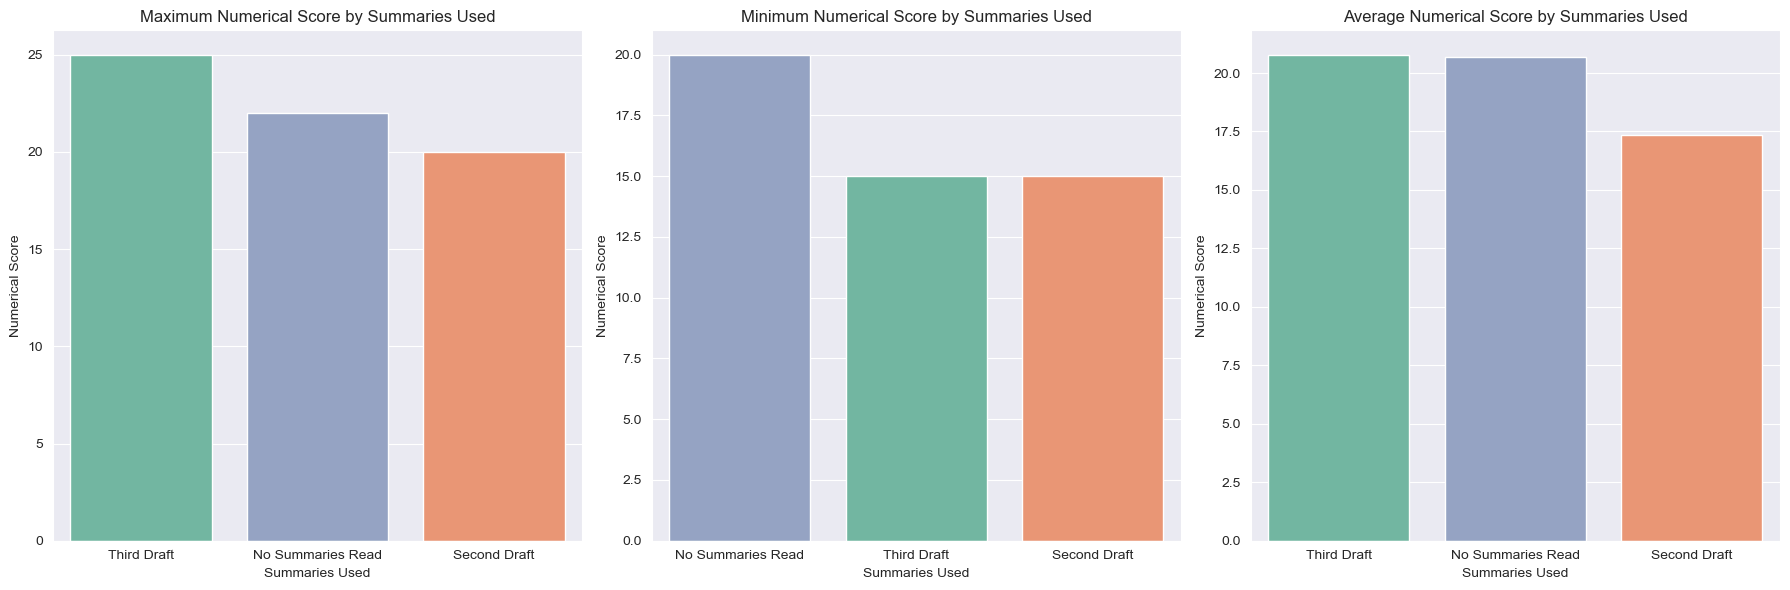

In [71]:
def score_aggregation_by_summaries_used(dataframe):
    columns = [
        "Summaries Used",
        "Maximum Numerical Score",
        "Maximum Percentage Score",
        "Minimum Numerical Score",
        "Minimum Percentage Score",
        "Average Numerical Score",
        "Average Percentage Score",
    ];
    data = [];
    for summariesUsed in dataframe["Summaries Used"].unique().tolist():
        row = [];
        dff = dataframe[dataframe["Summaries Used"] == summariesUsed];
        
        # Position
        row.append(summariesUsed);
        # Maximum Score
        row.append(np.max(dff["Numerical Score"]));
        row.append(np.max(dff["Percentage Score"]));
        # Minimum Score
        row.append(np.min(dff["Numerical Score"]));
        row.append(np.min(dff["Percentage Score"]));
        # Average Score
        row.append(np.mean(dff["Numerical Score"]));
        row.append(np.mean(dff["Percentage Score"]));

        data.append(row);
    
    df_agg = pd.DataFrame(data, columns=columns);
    display(df_agg);

    fig, axes = plt.subplots(1, 3, figsize=(18, 6));
    standardized_palette = {
        "Third Draft":"#66c2a5",
        "Second Draft":"#fc8d62",
        "No Summaries Read":"#8da0cb"
    };
    sns.barplot(
        data=df_agg.sort_values(by="Maximum Numerical Score", ascending=False), 
        x="Summaries Used", 
        y="Maximum Numerical Score", 
        ax=axes[0],
        palette=standardized_palette
    );
    axes[0].set(title="Maximum Numerical Score by Summaries Used", ylabel="Numerical Score");
    sns.barplot(
        data=df_agg.sort_values(by="Minimum Numerical Score", ascending=False), 
        x="Summaries Used", 
        y="Minimum Numerical Score", 
        ax=axes[1],
        palette=standardized_palette
    );
    axes[1].set(title="Minimum Numerical Score by Summaries Used", ylabel="Numerical Score");
    sns.barplot(
        data=df_agg.sort_values(by="Average Numerical Score", ascending=False), 
        x="Summaries Used", 
        y="Average Numerical Score", 
        ax=axes[2],
        palette=standardized_palette
    );
    axes[2].set(title="Average Numerical Score by Summaries Used", ylabel="Numerical Score");
    plt.tight_layout();

score_aggregation_by_summaries_used(df)

**Top Scoring Employees Overall**

In [72]:
def top_scoring_employees(data, col):
    if col == None:
        print("Top Scoring Employees Overall:");
        display(data.sort_values(by="Numerical Score", ascending=False).head(3));
    else:
        for col_value in data[col].unique().tolist():
            if col == "Position":
                print(f"Top Scoring {col_value}:");
            elif col == "Department":
                print(f"Top Scoring Employee/s in the {col_value} Department:");
            elif col == "Type of Training":
                print(f"Top Scoring Employee/s that completed {col_value} Training:");
            elif col == "Summaries Used":
                print(f"Top Scoring Employee/s based on {col_value}:");
            dff = data[data[col] == col_value];
            max_score = np.max(dff["Numerical Score"]);
            display(dff[dff["Numerical Score"] == max_score]);

In [73]:
top_scoring_employees(df, None)

Top Scoring Employees Overall:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
11,KH,CS,Sales,Refresher,Third Draft,25/25,25,100.0,NaN
3,AK,CS,Sales,Refresher,Third Draft,24/25,24,96.0,Bonus Point added because CS volunteered to be...
1,DH,BARD,Sales,Refresher,Third Draft,23/25,23,92.0,NaN


**Top Scoring Employees per Position**

In [74]:
top_scoring_employees(df, "Position")

Top Scoring ABM:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
0,MBA,ABM,Management,Refresher,No Summaries Read,22/25,22,88.0,Current Assistant Boutique Manager – Did not r...


Top Scoring BARD:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
1,DH,BARD,Sales,Refresher,Third Draft,23/25,23,92.0,NaN


Top Scoring BM:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
2,SS,BM,Management,Refresher,No Summaries Read,20/25,20,80.0,Current Boutique Manager – Did not read summaries


Top Scoring CS:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
11,KH,CS,Sales,Refresher,Third Draft,25/25,25,100.0,NaN


Top Scoring SS:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
14,LS,SS,Stock,Induction,Third Draft,21/25,21,84.0,NaN
15,MaC,SS,Stock,Refresher,Third Draft,21/25,21,84.0,NaN


Top Scoring SSS:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
16,MarC,SSS,Stock,Refresher,Third Draft,21/25,21,84.0,NaN


Top Scoring TL:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
20,SV,TL,Management,Refresher,Second Draft,20/25,20,80.0,NaN


**Top Scoring Employees per Department**

In [75]:
top_scoring_employees(df, "Department")

Top Scoring Employee/s in the Management Department:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
0,MBA,ABM,Management,Refresher,No Summaries Read,22/25,22,88.0,Current Assistant Boutique Manager – Did not r...


Top Scoring Employee/s in the Sales Department:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
11,KH,CS,Sales,Refresher,Third Draft,25/25,25,100.0,NaN


Top Scoring Employee/s in the Stock Department:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
14,LS,SS,Stock,Induction,Third Draft,21/25,21,84.0,NaN
15,MaC,SS,Stock,Refresher,Third Draft,21/25,21,84.0,NaN
16,MarC,SSS,Stock,Refresher,Third Draft,21/25,21,84.0,NaN


**Top Scoring Employee/s based on Type of Training**

In [76]:
top_scoring_employees(df, "Type of Training")

Top Scoring Employee/s that completed Refresher Training:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
11,KH,CS,Sales,Refresher,Third Draft,25/25,25,100.0,NaN


Top Scoring Employee/s that completed Induction Training:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
7,CD,CS,Sales,Induction,Third Draft,21/25,21,84.0,NaN
14,LS,SS,Stock,Induction,Third Draft,21/25,21,84.0,NaN


**Top Scoring Employee/s based on Summaries Used**

In [77]:
top_scoring_employees(df, "Summaries Used")

Top Scoring Employee/s based on No Summaries Read:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
0,MBA,ABM,Management,Refresher,No Summaries Read,22/25,22,88.0,Current Assistant Boutique Manager – Did not r...


Top Scoring Employee/s based on Third Draft:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
11,KH,CS,Sales,Refresher,Third Draft,25/25,25,100.0,NaN


Top Scoring Employee/s based on Second Draft:


,Employee,Position,Department,Type of Training,Summaries Used,Score,Numerical Score,Percentage Score,Notes
20,SV,TL,Management,Refresher,Second Draft,20/25,20,80.0,NaN
